In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization, Activation, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from glob import glob
import pandas as pd
import random
import os
import numpy as np 
import cv2
from IPython.display import SVG, Image
print("tensorflow version: ", tf.__version__)



tensorflow version:  2.16.1


**Exploring dataset**

(-0.5, 47.5, 47.5, -0.5)

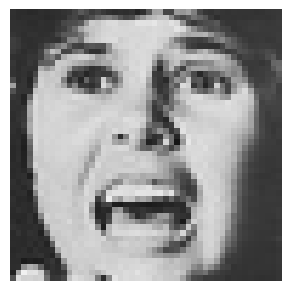

In [5]:
images = glob("Null Class/archive/train/*/*")
for i in range(9):
    image = random.choice(images)
plt.figure(figsize=(12,12))
plt.subplot(331+i)
plt.imshow(cv2.imread(image));plt.axis('off')

**preparing data**

In [4]:
Image_size = 48
Batch_size = 50

Datagen_train = ImageDataGenerator()
train_generator = Datagen_train.flow_from_directory(
    "Null Class/archive/train/",
    target_size=(Image_size, Image_size),
    batch_size=Batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True
)

Datagen_validation = ImageDataGenerator()
train_validation = Datagen_train.flow_from_directory(
    "Null Class/archive/test/",
    target_size=(Image_size, Image_size),
    batch_size=Batch_size,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True
)




Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Image_size = 48
Batch_size = 50

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(Image_size, Image_size, 1)))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Datagen_train = ImageDataGenerator(rescale=0.1/255)
Datagen_validation = ImageDataGenerator(rescale=0.1/255)

train_generator = Datagen_train.flow_from_directory(
    'Null Class/archive/train/',
    target_size=(Image_size, Image_size),
    batch_size=Batch_size,
    color_mode='grayscale',
    class_mode='sparse'
)

validation_generator = Datagen_validation.flow_from_directory(
    'Null Class/archive/test/',
    target_size=(Image_size, Image_size),
    batch_size=Batch_size,
    color_mode='grayscale',
    class_mode='sparse'
)

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // Batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // Batch_size,
    epochs=30
)

model.summary()


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 47s 77ms/step - accuracy: 0.2447 - loss: 1.8137 - val_accuracy: 0.3483 - val_loss: 1.6680
Epoch 2/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step - accuracy: 0.3600 - loss: 1.6842 - val_accuracy: 0.1786 - val_loss: 1.7208
Epoch 3/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 45s 77ms/step - accuracy: 0.3465 - loss: 1.6545 - val_accuracy: 0.4053 - val_loss: 1.5427
Epoch 4/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 73us/step - accuracy: 0.4200 - loss: 1.6164 - val_accuracy: 0.4286 - val_loss: 1.5608
Epoch 5/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 44s 76ms/step - accuracy: 0.3943 - loss: 1.5607 - val_accuracy: 0.4344 - val_loss: 1.4688
Epoch 6/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 82us/step - accuracy: 0.4400 - loss: 1.5552 - val_accuracy: 0.3929 - val_loss: 1.3175
Epoch 7/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 46s 81ms/step - accuracy: 0.4189 - loss: 1.4978 - val_accuracy: 0.4555 - val_loss: 1.4223
Epoch 8

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_40 (LeakyReLU)           │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_41 (LeakyReLU)           │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_42 (LeakyReLU)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_43 (LeakyReLU)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,436,055 (13.11 MB)

 Trainable params: 1,145,351 (4.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,290,704 (8.74 MB)

**Evaluate CNN model**

In [36]:
model.evaluate(validation_generator)

144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.5660 - loss: 1.1476


[1.1601598262786865, 0.5592086911201477]

**long Short Term Memory Model**

In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, SpatialDropout1D
from sklearn.metrics import mean_squared_error

timesteps = 10  
features = 8   
x_train = np.random.rand(1000, timesteps, features)
y_train = np.random.rand(1000, timesteps, 3)
X_test = np.random.rand(200, timesteps, features)    
y_test = np.random.rand(200, timesteps, 3)           

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(timesteps, features)))
model.add(SpatialDropout1D(0.2))
model.add(TimeDistributed(Dense(3)))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.3285 - loss: 0.1702 - val_accuracy: 0.3200 - val_loss: 0.1097
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3443 - loss: 0.1119 - val_accuracy: 0.3205 - val_loss: 0.1005
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3317 - loss: 0.1035 - val_accuracy: 0.3260 - val_loss: 0.0951
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3383 - loss: 0.0992 - val_accuracy: 0.3360 - val_loss: 0.0916
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3404 - loss: 0.0942 - val_accuracy: 0.3335 - val_loss: 0.0896
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3293 - loss: 0.0928 - val_accuracy: 0.3030 - val_loss: 0.0882
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3236 - loss: 0.0914 - val_accuracy: 0.3160 - val_loss: 0.0873
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3400 - loss: 0.0910 - val_accuracy: 0.3185 - v

**Evaluating LSTM model**

In [24]:
evaluation = model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3298 - loss: 0.0836 


**Ploting Graph**

**Ploting Model loss**

In [25]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

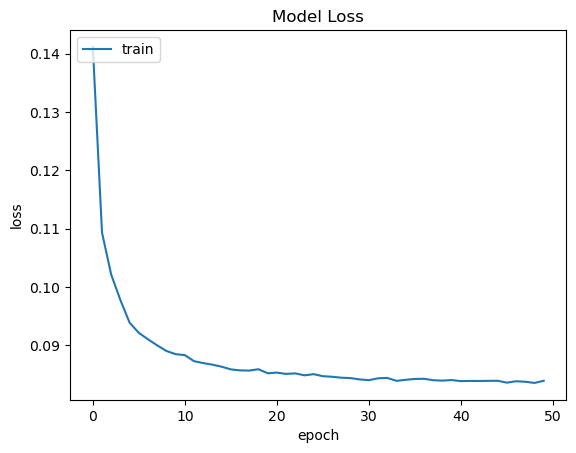

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'], loc='upper left')
plt.show()

**Ploting model accuracy**

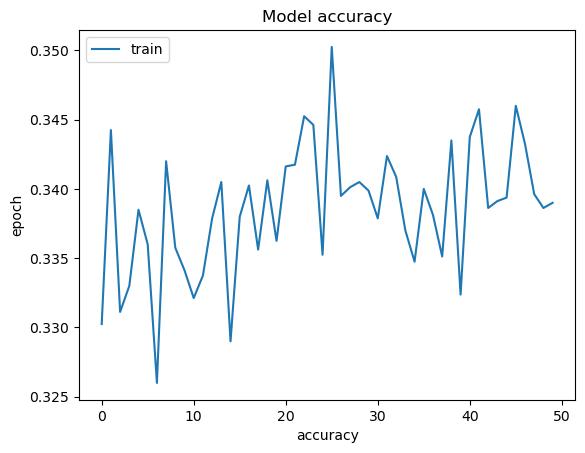

In [28]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.title("Model accuracy")
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

**Saving Model**